In [1]:
#from sklearn import datasets
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
#from sklearn.metrics import precision_recall_fscore_support as score
from keras.utils import np_utils
from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
train = pd.read_csv('0505final_train.csv')

In [4]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
#train = shuffle(train)

In [5]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values
train_y = np_utils.to_categorical(train_y, num_classes = 4)

In [6]:
new_all_feature = preprocessing.scale(train_feature)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [8]:
model = Sequential()

In [9]:
model.add( Dense(units=128, input_shape=[52],            #52,47
                 kernel_initializer='he_normal',
                 kernel_regularizer= regularizers.l2(0.1),  #0.04   #0.04   #1層  0.02
#           bias_regularizer = regularizers.l2(0.05),  #0.05
#           activity_regularizer=regularizers.l2(0.0001),                      
                 activation='relu') )

In [10]:
model.add(Dropout(0.4))  #ep 300

In [11]:
model.add( Dense(units=64,
                 kernel_initializer='he_normal',  #he_normal
                 kernel_regularizer= regularizers.l2(0.1),   #0.06
#               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
                 activation='relu'))   #relu

In [12]:
model.add(Dropout(0.4))  #ep 100    #0.5  #0.3

In [13]:
model.add( Dense(units=4, 
#                kernel_initializer='normal',
                 activation='softmax'))    # kernel_initializer='normal',

In [14]:
model.compile( optimizer = 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [15]:
#train_history = model.fit(new_all_feature , train_y, 
#                          validation_split=0.1, 
#                          epochs = 500, batch_size=15,verbose=2)  # 50 ,15  # 100, 15 #500,15  #50,171 #100,171 #500,171

In [16]:
train_history = model.fit(new_all_feature , train_y, 
                          validation_split=0.1, 
                          epochs = 500, batch_size=171,verbose=1)

Train on 171 samples, validate on 20 samples
Epoch 1/500
171/171 [==============================] - 0s 1ms/step - loss: 32.1271 - acc: 0.3626 - val_loss: 31.5323 - val_acc: 0.2000
Epoch 2/500
171/171 [==============================] - 0s 23us/step - loss: 31.7249 - acc: 0.3567 - val_loss: 31.2432 - val_acc: 0.2000
Epoch 3/500
171/171 [==============================] - 0s 29us/step - loss: 31.3076 - acc: 0.3743 - val_loss: 30.9139 - val_acc: 0.2000
Epoch 4/500
171/171 [==============================] - 0s 23us/step - loss: 31.0470 - acc: 0.3918 - val_loss: 30.6072 - val_acc: 0.2000
Epoch 5/500
171/171 [==============================] - 0s 29us/step - loss: 30.7712 - acc: 0.4444 - val_loss: 30.2838 - val_acc: 0.2500
Epoch 6/500
171/171 [==============================] - 0s 29us/step - loss: 30.4033 - acc: 0.4094 - val_loss: 29.9728 - val_acc: 0.2500
Epoch 7/500
171/171 [==============================] - 0s 18us/step - loss: 30.1866 - acc: 0.4211 - val_loss: 29.6558 - val_acc: 0.2500
Epoc

Epoch 61/500
171/171 [==============================] - 0s 23us/step - loss: 16.8107 - acc: 0.5322 - val_loss: 16.8097 - val_acc: 0.5000
Epoch 62/500
171/171 [==============================] - 0s 29us/step - loss: 16.6758 - acc: 0.5322 - val_loss: 16.6374 - val_acc: 0.5000
Epoch 63/500
171/171 [==============================] - 0s 23us/step - loss: 16.5311 - acc: 0.4912 - val_loss: 16.4670 - val_acc: 0.5000
Epoch 64/500
171/171 [==============================] - 0s 17us/step - loss: 16.3367 - acc: 0.5731 - val_loss: 16.2983 - val_acc: 0.4500
Epoch 65/500
171/171 [==============================] - 0s 23us/step - loss: 16.2247 - acc: 0.5322 - val_loss: 16.1317 - val_acc: 0.4500
Epoch 66/500
171/171 [==============================] - 0s 29us/step - loss: 15.9630 - acc: 0.5965 - val_loss: 15.9670 - val_acc: 0.4500
Epoch 67/500
171/171 [==============================] - 0s 23us/step - loss: 15.8017 - acc: 0.5556 - val_loss: 15.8042 - val_acc: 0.4500
Epoch 68/500
171/171 [===================

Epoch 121/500
171/171 [==============================] - 0s 17us/step - loss: 9.1618 - acc: 0.5614 - val_loss: 9.2475 - val_acc: 0.5500
Epoch 122/500
171/171 [==============================] - 0s 18us/step - loss: 9.0333 - acc: 0.6374 - val_loss: 9.1598 - val_acc: 0.5500
Epoch 123/500
171/171 [==============================] - 0s 23us/step - loss: 8.9516 - acc: 0.5848 - val_loss: 9.0728 - val_acc: 0.5500
Epoch 124/500
171/171 [==============================] - 0s 23us/step - loss: 8.8933 - acc: 0.6199 - val_loss: 8.9869 - val_acc: 0.5500
Epoch 125/500
171/171 [==============================] - 0s 23us/step - loss: 8.7935 - acc: 0.6082 - val_loss: 8.9022 - val_acc: 0.5500
Epoch 126/500
171/171 [==============================] - 0s 23us/step - loss: 8.6840 - acc: 0.5965 - val_loss: 8.8182 - val_acc: 0.5500
Epoch 127/500
171/171 [==============================] - 0s 23us/step - loss: 8.5897 - acc: 0.6316 - val_loss: 8.7356 - val_acc: 0.5500
Epoch 128/500
171/171 [=========================

Epoch 182/500
171/171 [==============================] - 0s 23us/step - loss: 5.1476 - acc: 0.6374 - val_loss: 5.3418 - val_acc: 0.5500
Epoch 183/500
171/171 [==============================] - 0s 29us/step - loss: 5.0793 - acc: 0.6374 - val_loss: 5.2968 - val_acc: 0.5500
Epoch 184/500
171/171 [==============================] - 0s 23us/step - loss: 5.0275 - acc: 0.6491 - val_loss: 5.2525 - val_acc: 0.5500
Epoch 185/500
171/171 [==============================] - 0s 23us/step - loss: 4.9931 - acc: 0.6082 - val_loss: 5.2089 - val_acc: 0.5500
Epoch 186/500
171/171 [==============================] - 0s 29us/step - loss: 4.9498 - acc: 0.6374 - val_loss: 5.1657 - val_acc: 0.5500
Epoch 187/500
171/171 [==============================] - 0s 23us/step - loss: 4.9021 - acc: 0.6257 - val_loss: 5.1231 - val_acc: 0.5500
Epoch 188/500
171/171 [==============================] - 0s 23us/step - loss: 4.8252 - acc: 0.6199 - val_loss: 5.0810 - val_acc: 0.5500
Epoch 189/500
171/171 [=========================

Epoch 243/500
171/171 [==============================] - 0s 23us/step - loss: 3.0490 - acc: 0.6784 - val_loss: 3.3504 - val_acc: 0.5000
Epoch 244/500
171/171 [==============================] - 0s 23us/step - loss: 3.0479 - acc: 0.6550 - val_loss: 3.3275 - val_acc: 0.5000
Epoch 245/500
171/171 [==============================] - 0s 23us/step - loss: 3.0404 - acc: 0.6667 - val_loss: 3.3049 - val_acc: 0.5000
Epoch 246/500
171/171 [==============================] - 0s 18us/step - loss: 3.0223 - acc: 0.6608 - val_loss: 3.2824 - val_acc: 0.5000
Epoch 247/500
171/171 [==============================] - 0s 23us/step - loss: 2.9859 - acc: 0.6433 - val_loss: 3.2603 - val_acc: 0.5000
Epoch 248/500
171/171 [==============================] - 0s 17us/step - loss: 2.9790 - acc: 0.6784 - val_loss: 3.2386 - val_acc: 0.5000
Epoch 249/500
171/171 [==============================] - 0s 23us/step - loss: 2.9479 - acc: 0.6433 - val_loss: 3.2171 - val_acc: 0.5000
Epoch 250/500
171/171 [=========================

Epoch 304/500
171/171 [==============================] - 0s 23us/step - loss: 2.0356 - acc: 0.6784 - val_loss: 2.3295 - val_acc: 0.5500
Epoch 305/500
171/171 [==============================] - 0s 17us/step - loss: 2.0092 - acc: 0.6667 - val_loss: 2.3176 - val_acc: 0.5500
Epoch 306/500
171/171 [==============================] - 0s 23us/step - loss: 2.0158 - acc: 0.6667 - val_loss: 2.3059 - val_acc: 0.5500
Epoch 307/500
171/171 [==============================] - 0s 23us/step - loss: 2.0037 - acc: 0.6842 - val_loss: 2.2944 - val_acc: 0.5500
Epoch 308/500
171/171 [==============================] - 0s 23us/step - loss: 1.9571 - acc: 0.6667 - val_loss: 2.2833 - val_acc: 0.5500
Epoch 309/500
171/171 [==============================] - 0s 23us/step - loss: 1.9754 - acc: 0.6725 - val_loss: 2.2723 - val_acc: 0.5500
Epoch 310/500
171/171 [==============================] - 0s 23us/step - loss: 1.9578 - acc: 0.6842 - val_loss: 2.2615 - val_acc: 0.5500
Epoch 311/500
171/171 [=========================

Epoch 365/500
171/171 [==============================] - 0s 23us/step - loss: 1.4883 - acc: 0.6784 - val_loss: 1.8329 - val_acc: 0.5000
Epoch 366/500
171/171 [==============================] - 0s 29us/step - loss: 1.4949 - acc: 0.6725 - val_loss: 1.8269 - val_acc: 0.5000
Epoch 367/500
171/171 [==============================] - 0s 23us/step - loss: 1.5003 - acc: 0.6608 - val_loss: 1.8210 - val_acc: 0.5000
Epoch 368/500
171/171 [==============================] - 0s 23us/step - loss: 1.4429 - acc: 0.7251 - val_loss: 1.8152 - val_acc: 0.5000
Epoch 369/500
171/171 [==============================] - 0s 23us/step - loss: 1.4707 - acc: 0.6550 - val_loss: 1.8099 - val_acc: 0.5000
Epoch 370/500
171/171 [==============================] - 0s 17us/step - loss: 1.4486 - acc: 0.7076 - val_loss: 1.8048 - val_acc: 0.5000
Epoch 371/500
171/171 [==============================] - 0s 23us/step - loss: 1.4530 - acc: 0.6959 - val_loss: 1.7997 - val_acc: 0.5000
Epoch 372/500
171/171 [=========================

Epoch 426/500
171/171 [==============================] - 0s 23us/step - loss: 1.2176 - acc: 0.6901 - val_loss: 1.5777 - val_acc: 0.5000
Epoch 427/500
171/171 [==============================] - 0s 18us/step - loss: 1.1958 - acc: 0.7310 - val_loss: 1.5758 - val_acc: 0.5000
Epoch 428/500
171/171 [==============================] - 0s 23us/step - loss: 1.1931 - acc: 0.7193 - val_loss: 1.5738 - val_acc: 0.5000
Epoch 429/500
171/171 [==============================] - 0s 23us/step - loss: 1.2063 - acc: 0.7018 - val_loss: 1.5722 - val_acc: 0.5000
Epoch 430/500
171/171 [==============================] - 0s 23us/step - loss: 1.2242 - acc: 0.7018 - val_loss: 1.5703 - val_acc: 0.5000
Epoch 431/500
171/171 [==============================] - 0s 17us/step - loss: 1.1874 - acc: 0.7193 - val_loss: 1.5686 - val_acc: 0.5000
Epoch 432/500
171/171 [==============================] - 0s 23us/step - loss: 1.1837 - acc: 0.6959 - val_loss: 1.5666 - val_acc: 0.5000
Epoch 433/500
171/171 [=========================

Epoch 487/500
171/171 [==============================] - 0s 17us/step - loss: 1.0812 - acc: 0.6842 - val_loss: 1.4620 - val_acc: 0.5000
Epoch 488/500
171/171 [==============================] - 0s 24us/step - loss: 1.0502 - acc: 0.7310 - val_loss: 1.4605 - val_acc: 0.5000
Epoch 489/500
171/171 [==============================] - 0s 23us/step - loss: 1.0623 - acc: 0.7076 - val_loss: 1.4589 - val_acc: 0.5000
Epoch 490/500
171/171 [==============================] - 0s 18us/step - loss: 1.0588 - acc: 0.7368 - val_loss: 1.4573 - val_acc: 0.5000
Epoch 491/500
171/171 [==============================] - 0s 23us/step - loss: 1.0393 - acc: 0.7310 - val_loss: 1.4556 - val_acc: 0.5000
Epoch 492/500
171/171 [==============================] - 0s 23us/step - loss: 1.0267 - acc: 0.7135 - val_loss: 1.4539 - val_acc: 0.5000
Epoch 493/500
171/171 [==============================] - 0s 23us/step - loss: 1.0762 - acc: 0.6842 - val_loss: 1.4524 - val_acc: 0.5000
Epoch 494/500
171/171 [=========================

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):  #,validation
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

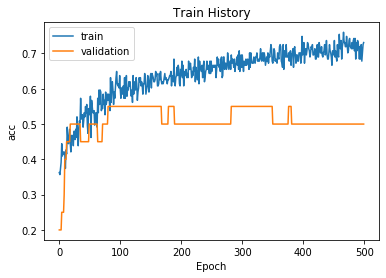

In [18]:
show_train_history(train_history,'acc','val_acc')

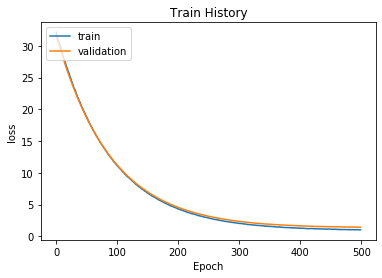

In [19]:
show_train_history(train_history,'loss','val_loss')  #

In [20]:
#test = pd.read_csv('0527test_data_final_real.csv')

In [21]:
test = pd.read_csv('0625test_data_final_real.csv')

In [22]:
test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)

In [23]:
test_feature = test.columns[1:]
test_target = test.columns[0]
test_feature = test[test_feature]
test_y = test[test_target]
test_y = test_y.values
test_y = np_utils.to_categorical(test_y, num_classes = 4)

In [24]:
test_scaledFeatures  = ( ( test_feature - train_feature.mean(axis=0) ) / train_feature.std(axis=0) )

In [25]:
test_out =  model.predict(test_scaledFeatures)

In [26]:
test_out

array([[0.48153198, 0.26119316, 0.17927398, 0.07800084],
       [0.61822164, 0.22314264, 0.10461243, 0.05402329],
       [0.5670426 , 0.28341264, 0.08924884, 0.06029589],
       [0.7279155 , 0.17037569, 0.05902144, 0.04268727],
       [0.60282683, 0.17014399, 0.1376477 , 0.08938149],
       [0.5014187 , 0.2886538 , 0.1429008 , 0.0670267 ],
       [0.6616006 , 0.17762658, 0.10200124, 0.05877155],
       [0.73070717, 0.09966764, 0.10128769, 0.06833754],
       [0.6846141 , 0.11654592, 0.12203293, 0.07680703],
       [0.50331026, 0.28003207, 0.1473011 , 0.06935656],
       [0.6057134 , 0.17710817, 0.13957708, 0.07760133]], dtype=float32)

In [27]:
test_out_class =  model.predict_classes(test_scaledFeatures)

In [28]:
test_out_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
test['HOSDAY'].values

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [30]:
pd.crosstab( test['HOSDAY'].values, test_out_class, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0
Actual Species,
0,5
1,6


In [31]:
score2 = model.evaluate(test_scaledFeatures, test_y, verbose=2)
score2

[1.3180824518203735, 0.4545454680919647]